## Importing Modules

In [179]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [180]:
# importing training data

data = pd.read_csv('LoansTrainingSet.csv')

In [181]:
data.info()

# Missing values in Credit Score, Annual Income, Months since last delinquent, Bankruptcies, Tax Liens
# Order of least missing data to most is: Tax Liens, Bankruptcies, Credit Score/Annual Income, Months since last delinquent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            256984 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [182]:
data.head(20)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
5,0000a149-b055-4a57-b762-280783ccc25e,62ddc017-7023-4ba7-af23-1a7cd16c1ce5,Fully Paid,10208,Short Term,716.0,10+ years,Rent,41853.0,Business Loan,$561.52,13.2,NaN,4,1,2289,4671,1.0,0.0
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,6640.0,6 years,Rent,49225.0,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6 years,Rent,NaN,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,Fully Paid,10036,Short Term,NaN,5 years,Rent,NaN,Debt Consolidation,$386.36,17.7,NaN,7,0,11970,16579,0.0,0.0
9,0001cb86-af28-4011-bb86-183786e473ae,4aae67bb-d54b-41ae-8bce-1d62022ed8dd,Fully Paid,2036,Short Term,733.0,n/a,Home Mortgage,55985.0,Debt Consolidation,$741.79,19.8,29.0,7,0,10926,15676,0.0,0.0


## Cleaning Data

In [183]:
# Checking for row duplicates
data.duplicated().sum()

16610

In [184]:
# Removing duplicate rows from the dataframe
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [185]:
# However, now there still may be duplicated but with missing values in the columns
data[['Loan ID', 'Customer ID']].duplicated().sum()

24674

In [186]:
# Examining duplicate rows
data[data.duplicated(['Loan ID', 'Customer ID'], keep=False)]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,6640.0,6 years,Rent,49225.0,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6 years,Rent,NaN,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,NaN,< 1 year,Own Home,NaN,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
13,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17961,Short Term,701.0,< 1 year,Own Home,53053.0,Debt Consolidation,$596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
15,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,701.0,< 1 year,Own Home,53112.0,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
21,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,734.0,3 years,Home Mortgage,40308.0,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
46,000a08fa-e669-46dc-9a96-9da6b96570a0,4b7782a6-b84c-4dd9-ac62-f927a68eeaa9,Charged Off,21160,Long Term,NaN,5 years,Home Mortgage,NaN,Debt Consolidation,"$1,290.98",20.8,NaN,28,0,28175,51227,0.0,0.0
47,000a08fa-e669-46dc-9a96-9da6b96570a0,4b7782a6-b84c-4dd9-ac62-f927a68eeaa9,Charged Off,21160,Long Term,636.0,5 years,Home Mortgage,77770.0,Debt Consolidation,"$1,290.98",20.8,NaN,28,0,28175,51227,0.0,0.0
55,000c0c27-1961-4336-b760-a300e1bce9b0,881edf98-387c-4eef-ab71-317a7a5e70c1,Charged Off,6463,Short Term,7320.0,1 year,Own Home,25248.0,Debt Consolidation,$633.29,19.9,74.0,9,0,8025,24317,0.0,0.0


In [259]:
grouped1 = data.groupby(['Loan ID', 'Customer ID']).min()
grouped1.reset_index(level=['Loan ID', 'Customer ID'], inplace=True)
grouped1

KeyboardInterrupt: 

In [188]:
grouped1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 12 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Current Loan Amount             215700 non-null float64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null float64
Number of Credit Problems       215700 non-null float64
Current Credit Balance          215700 non-null float64
Bankruptcies                    215248 non-null float64
Tax Liens                       215678 non-null float64
dtypes: float64(10), object(2)
memory usage: 19.7+ MB


In [189]:
grouped1.duplicated().sum()

0

In [190]:
# Now we have to merge it back with the other columns
grouped2 = data[['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt', 'Maximum Open Credit']]
grouped2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240374 entries, 0 to 256983
Data columns (total 9 columns):
Loan ID                 240374 non-null object
Customer ID             240374 non-null object
Loan Status             240374 non-null object
Term                    240374 non-null object
Years in current job    240374 non-null object
Home Ownership          240374 non-null object
Purpose                 240374 non-null object
Monthly Debt            240374 non-null object
Maximum Open Credit     240374 non-null object
dtypes: object(9)
memory usage: 18.3+ MB


In [191]:
data = pd.merge(left=grouped1, right=grouped2, how='inner', on=['Loan ID', 'Customer ID'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240374 entries, 0 to 240373
Data columns (total 19 columns):
Loan ID                         240374 non-null object
Customer ID                     240374 non-null object
Current Loan Amount             240374 non-null float64
Credit Score                    195873 non-null float64
Annual Income                   195873 non-null float64
Years of Credit History         240374 non-null float64
Months since last delinquent    108947 non-null float64
Number of Open Accounts         240374 non-null float64
Number of Credit Problems       240374 non-null float64
Current Credit Balance          240374 non-null float64
Bankruptcies                    239882 non-null float64
Tax Liens                       240351 non-null float64
Loan Status                     240374 non-null object
Term                            240374 non-null object
Years in current job            240374 non-null object
Home Ownership                  240374 non-null object

In [192]:
data.drop_duplicates(['Loan ID', 'Customer ID'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 240373
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Current Loan Amount             215700 non-null float64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null float64
Number of Credit Problems       215700 non-null float64
Current Credit Balance          215700 non-null float64
Bankruptcies                    215248 non-null float64
Tax Liens                       215678 non-null float64
Loan Status                     215700 non-null object
Term                            215700 non-null object
Years in current job            215700 non-null object
Home Ownership                  215700 non-null object


In [193]:
data['Loan Status'].value_counts()
# No spelling discrepancies with loan status

Fully Paid     176191
Charged Off     39509
Name: Loan Status, dtype: int64

In [194]:
data[(data['Current Loan Amount'] == 99999999) & (data['Loan Status'] == 'Charged Off')]

# Those with a current loan amount of 99999999 all have a fully paid loan status

,Loan ID,Customer ID,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit


In [195]:
data[(data['Current Loan Amount'] == 0) & (data['Loan Status'] == 'Fully Paid')]

# So those who have a current loan amount of 99999999 should have a 0 instead

,Loan ID,Customer ID,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit


In [196]:
data[data['Current Loan Amount'] == 0]

,Loan ID,Customer ID,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit


In [197]:
# Changing current loan amount to 0 for those who have 99999999 as the current loan amount

data['Current Loan Amount'] = data['Current Loan Amount'].apply(lambda x: 0 if x == 99999999 else x)

In [198]:
data['Current Loan Amount'].max()
# Verifies we removed the faulty values

41000.0

In [199]:
data['Term'].value_counts()
# No spelling discrepancies

Short Term    166523
Long Term      49177
Name: Term, dtype: int64

In [200]:
data['Credit Score'].value_counts()

# We have credit scores with an extra 0 at the end

data['Credit Score'] = data['Credit Score'].apply(lambda x: (x/10) if x > 850 else 300 if x < 300 else x)

In [201]:
data['Credit Score'].min()

245.19999999999999

In [202]:
data['Years in current job'].value_counts()

10+ years    66711
2 years      19831
< 1 year     17544
3 years      17428
5 years      14987
1 year       14130
4 years      13632
6 years      12230
7 years      11713
8 years      10232
n/a           8990
9 years       8272
Name: Years in current job, dtype: int64

In [203]:
# Longer employment means a higher chance of getting a loan, changing these values to ints so they become ordinal
import re
data['Years in current job'] = data["Years in current job"].apply(lambda x: 0.5 if x == '< 1 year' else float(filter(str.isdigit, x)) if x != 'n/a' else 0)

In [204]:
data['Years in current job'].value_counts()

# I used 0.5 to distinguish between < 1 year and 1 year

10.0    66711
2.0     19831
0.5     17544
3.0     17428
5.0     14987
1.0     14130
4.0     13632
6.0     12230
7.0     11713
8.0     10232
0.0      8990
9.0      8272
Name: Years in current job, dtype: int64

In [205]:
data['Home Ownership'].value_counts()

Home Mortgage    106492
Rent              89619
Own Home          19094
HaveMortgage        495
Name: Home Ownership, dtype: int64

In [206]:
# Need to change values of HaveMortgage to Home Mortgage
data['Home Ownership'] = data['Home Ownership'].apply(lambda x: 'Home Mortgage' if x == 'HaveMortgage' else x)

In [207]:
data['Home Ownership'].value_counts()

Home Mortgage    106987
Rent              89619
Own Home          19094
Name: Home Ownership, dtype: int64

In [208]:
data['Annual Income'].max()

8713547.0

In [209]:
data['Purpose'].value_counts()

Debt Consolidation      171096
Home Improvements        12840
other                    11726
Other                     8281
Business Loan             3611
Buy a Car                 2926
Medical Bills             2375
Take a Trip               1312
Buy House                 1308
Educational Expenses       225
Name: Purpose, dtype: int64

In [210]:
# 2 instances of other
data['Purpose'] = data['Purpose'].apply(lambda x: 'Other' if x == 'other' else x)

In [211]:
data['Purpose'].value_counts()

Debt Consolidation      171096
Other                    20007
Home Improvements        12840
Business Loan             3611
Buy a Car                 2926
Medical Bills             2375
Take a Trip               1312
Buy House                 1308
Educational Expenses       225
Name: Purpose, dtype: int64

In [212]:
data['Monthly Debt'].value_counts()

# We need to remove commas and dollar signs

$0.00         215
$837.00        10
$847.85         9
$733.15         9
$612.74         9
$775.08         9
$679.66         9
$838.10         9
$1,198.46       8
$938.11         8
$533.77         8
$786.24         8
$410.09         8
$538.02         8
$729.86         8
$865.30         8
$807.53         8
$628.45         8
$497.35         8
$635.31         8
$776.99         8
$454.64         8
$733.90         8
$600.83         8
$722.53         8
$659.82         8
$702.16         8
$910.08         8
$646.93         8
$589.63         8
             ... 
$2,242.63       1
$5,912.97       1
$141.53         1
$141.50         1
$141.55         1
$1,767.01       1
$1,580.99       1
$1,138.25       1
$278.02         1
$1,751.02       1
$675.47         1
$533.32         1
$1,898.66       1
$1,525.56       1
$167.17         1
$1,036.95       1
$263.00         1
$3,049.38       1
$675.49         1
$675.45         1
$1,037.38       1
$675.44         1
$1,351.65       1
$1,102.58       1
$1,253.94 

In [213]:
data['Monthly Debt'] = data['Monthly Debt'].apply(lambda x: x.translate(None, '$,'))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 240373
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Current Loan Amount             215700 non-null float64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null float64
Number of Credit Problems       215700 non-null float64
Current Credit Balance          215700 non-null float64
Bankruptcies                    215248 non-null float64
Tax Liens                       215678 non-null float64
Loan Status                     215700 non-null object
Term                            215700 non-null object
Years in current job            215700 non-null float64
Home Ownership                  215700 non-null object

In [214]:
data['Monthly Debt'].value_counts()
# Note: Will need to change the hierarchy

0.00        215
837.00       10
847.85        9
733.15        9
838.10        9
612.74        9
775.08        9
679.66        9
668.10        8
631.13        8
910.08        8
865.30        8
676.62        8
1198.46       8
533.77        8
765.00        8
750.74        8
410.09        8
833.32        8
646.93        8
600.83        8
938.11        8
786.24        8
733.90        8
729.86        8
635.31        8
659.82        8
628.45        8
722.53        8
807.53        8
           ... 
1403.76       1
908.21        1
1292.78       1
908.22        1
908.24        1
908.27        1
57.90         1
57.94         1
1058.16       1
1766.14       1
1207.02       1
960.33        1
576.17        1
576.18        1
1964.69       1
620.57        1
1070.42       1
1307.92       1
66.92         1
2138.68       1
2197.66       1
1949.09       1
1234.43       1
2175.43       1
1364.78       1
1130.18       1
2496.71       1
2659.63       1
1338.64       1
1390.44       1
Name: Monthly Debt, Leng

In [215]:
# changing monthly debt to float values

data = data.astype({'Monthly Debt':float})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 240373
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Current Loan Amount             215700 non-null float64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null float64
Number of Credit Problems       215700 non-null float64
Current Credit Balance          215700 non-null float64
Bankruptcies                    215248 non-null float64
Tax Liens                       215678 non-null float64
Loan Status                     215700 non-null object
Term                            215700 non-null object
Years in current job            215700 non-null float64
Home Ownership                  215700 non-null object

In [216]:
data['Years of Credit History'].value_counts()

16.0    2982
15.0    2855
17.0    2576
14.0    2503
16.5    2481
15.4    2424
14.5    2274
13.0    2260
18.0    2212
17.5    2189
12.0    1871
18.5    1841
13.5    1762
15.8    1749
20.5    1724
19.0    1675
20.0    1674
14.8    1637
16.8    1631
15.7    1587
11.0    1577
12.5    1576
19.4    1542
16.7    1538
21.0    1536
10.0    1520
15.9    1478
21.5    1465
13.8    1457
15.6    1449
        ... 
57.8       1
64.6       1
57.5       1
61.8       1
53.7       1
23.1       1
25.4       1
70.5       1
56.9       1
54.7       1
29.6       1
6.4        1
55.6       1
55.0       1
59.1       1
58.8       1
55.3       1
66.0       1
23.6       1
57.6       1
56.1       1
57.0       1
13.7       1
56.0       1
60.5       1
3.4        1
61.3       1
54.6       1
54.3       1
52.8       1
Name: Years of Credit History, Length: 593, dtype: int64

In [217]:
data['Months since last delinquent'].value_counts()

12.0     1841
14.0     1829
8.0      1787
15.0     1786
9.0      1762
16.0     1723
7.0      1719
13.0     1712
10.0     1710
18.0     1708
17.0     1700
6.0      1656
19.0     1639
11.0     1619
23.0     1601
20.0     1601
30.0     1586
21.0     1580
25.0     1572
28.0     1551
22.0     1547
26.0     1533
27.0     1532
29.0     1477
24.0     1476
31.0     1475
34.0     1452
38.0     1428
33.0     1417
32.0     1411
         ... 
152.0       2
93.0        2
104.0       2
110.0       2
120.0       2
101.0       2
130.0       2
151.0       1
102.0       1
134.0       1
149.0       1
107.0       1
115.0       1
113.0       1
98.0        1
133.0       1
116.0       1
148.0       1
140.0       1
122.0       1
119.0       1
108.0       1
109.0       1
176.0       1
114.0       1
143.0       1
118.0       1
97.0        1
112.0       1
139.0       1
Name: Months since last delinquent, Length: 131, dtype: int64

In [218]:
data['Number of Open Accounts'].value_counts()

# Having 20+ credit cards seems kind of ridiculous

9.0     20533
10.0    19526
8.0     19488
11.0    17985
7.0     17626
12.0    15862
6.0     14798
13.0    13447
14.0    11380
5.0     10406
15.0     9070
16.0     7522
4.0      6158
17.0     6061
18.0     4857
19.0     3926
20.0     3030
3.0      2836
21.0     2340
22.0     1817
23.0     1429
24.0     1131
2.0       914
25.0      841
26.0      608
27.0      473
28.0      336
29.0      243
30.0      198
31.0      176
32.0      149
33.0       97
34.0       86
35.0       65
37.0       46
36.0       46
1.0        31
38.0       31
39.0       25
41.0       21
40.0       21
42.0       13
45.0        8
43.0        7
47.0        6
44.0        5
46.0        3
48.0        3
0.0         3
53.0        3
58.0        2
52.0        2
55.0        2
76.0        2
50.0        2
49.0        1
54.0        1
51.0        1
56.0        1
Name: Number of Open Accounts, dtype: int64

In [219]:
data['Number of Open Accounts'].max()

76.0

In [220]:
data['Number of Credit Problems'].value_counts()

# Note: Will need to change the hierarchy

0.0     187484
1.0      24682
2.0       2480
3.0        665
4.0        216
5.0         99
6.0         36
7.0         14
8.0         11
10.0         6
9.0          5
11.0         2
Name: Number of Credit Problems, dtype: int64

In [221]:
data['Current Credit Balance'].value_counts()
# Note: Will need to change the hierarchy

0.000000         1349
10168.000000       24
10228.000000       23
7572.000000        23
3420.000000        23
5383.000000        22
6100.000000        22
6910.000000        22
4040.000000        22
4654.000000        22
9430.000000        22
5512.000000        22
6539.000000        22
4831.000000        22
5550.000000        21
3773.000000        21
9626.000000        21
6557.000000        21
3600.000000        21
6933.000000        21
6427.000000        21
6786.000000        21
7346.000000        21
7816.000000        21
4031.000000        21
7695.000000        21
5856.000000        21
5344.000000        21
6201.000000        21
6307.000000        21
                 ... 
120618.000000       1
60311.000000        1
118740.000000       1
37283.000000        1
149129.000000       1
35984.000000        1
109356.000000       1
107331.000000       1
60313.000000        1
34560.000000        1
43933.000000        1
52890.000000        1
20934.000000        1
37277.000000        1
67130.0000

In [222]:
data['Maximum Open Credit'].value_counts()
# Why are there two 0's?


0          1381
0           206
15662        15
10198        15
12202        14
8792         14
14799        14
10597        14
11128        14
7067         14
8589         14
15348        14
21523        14
9501         14
16679        13
16674        13
12051        13
16693        13
16594        13
16709        13
16303        13
11220        13
11345        13
7140         13
12251        13
14770        13
12195        13
14803        13
11791        13
10440        13
           ... 
21007         1
44751         1
21005         1
68222         1
32267         1
2820735       1
30642         1
68227         1
32283         1
32285         1
32286         1
13095         1
13292         1
24052         1
68178         1
32305         1
68180         1
68188         1
280846        1
68192         1
32744         1
68195         1
68196         1
68197         1
13098         1
43400         1
68199         1
13096         1
32288         1
38346         1
Name: Maximum Open Credi

In [223]:
data.info()
# Why is the data type object for max open credit?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 240373
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Current Loan Amount             215700 non-null float64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null float64
Number of Credit Problems       215700 non-null float64
Current Credit Balance          215700 non-null float64
Bankruptcies                    215248 non-null float64
Tax Liens                       215678 non-null float64
Loan Status                     215700 non-null object
Term                            215700 non-null object
Years in current job            215700 non-null float64
Home Ownership                  215700 non-null object

In [224]:
# Combining 0's

data['Maximum Open Credit'] = data['Maximum Open Credit'].apply(lambda x: 0 if x == '0' else x)
data['Maximum Open Credit'].value_counts()

0         1587
10198       15
15662       15
10597       14
11128       14
21523       14
8589        14
9501        14
14799       14
15348       14
12202       14
7067        14
8792        14
18598       13
7140        13
16861       13
13790       13
10180       13
11553       13
18386       13
16303       13
11220       13
11791       13
12251       13
10440       13
9082        13
10648       13
16709       13
21517       13
16693       13
          ... 
38879        1
65556        1
65557        1
15649        1
65561        1
28194        1
7446         1
65565        1
26678        1
38032        1
65571        1
327717       1
7444         1
35549        1
65544        1
65542        1
65541        1
65539        1
65538        1
65531        1
327674       1
7181         1
21367        1
36963        1
65521        1
28192        1
65517        1
28196        1
28197        1
34645        1
Name: Maximum Open Credit, Length: 87024, dtype: int64

In [225]:
# Missing values
data[data['Maximum Open Credit'] == '#VALUE!']

,Loan ID,Customer ID,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
172595,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,1470.0,725.00,39200.0,15.3,26.0,3.0,0.0,0.0,0.0,0.0,Charged Off,Short Term,2.0,Rent,Debt Consolidation,506.34,#VALUE!
175260,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,23897.0,383.35,49785.0,13.0,NaN,6.0,0.0,0.0,0.0,0.0,Charged Off,Long Term,7.0,Home Mortgage,Home Improvements,1306.86,#VALUE!


In [226]:
data['Maximum Open Credit'] = data['Maximum Open Credit'].apply(lambda x: np.NaN if x == '#VALUE!' else x)
data.info()

# Max open credit now has missing values
# Missing values from least to greatest: Maximum Open Credit, Tax Liens, Bankruptcies, Annual Income/Credit Score, Months since last delinquent 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 240373
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Current Loan Amount             215700 non-null float64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null float64
Number of Credit Problems       215700 non-null float64
Current Credit Balance          215700 non-null float64
Bankruptcies                    215248 non-null float64
Tax Liens                       215678 non-null float64
Loan Status                     215700 non-null object
Term                            215700 non-null object
Years in current job            215700 non-null float64
Home Ownership                  215700 non-null object

In [227]:
# Casting Maximum Open Credit to floats
data = data.astype({'Maximum Open Credit':float})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 240373
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Current Loan Amount             215700 non-null float64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null float64
Number of Credit Problems       215700 non-null float64
Current Credit Balance          215700 non-null float64
Bankruptcies                    215248 non-null float64
Tax Liens                       215678 non-null float64
Loan Status                     215700 non-null object
Term                            215700 non-null object
Years in current job            215700 non-null float64
Home Ownership                  215700 non-null object

## Need to fill in missing data

Missing values from least to greatest: Maximum Open Credit, Tax Liens, Bankruptcies, Annual Income/Credit Score, Months since last delinquent

In [228]:
data.nunique()

Loan ID                         215700
Customer ID                     215700
Current Loan Amount              27935
Credit Score                       461
Annual Income                    60855
Years of Credit History            593
Months since last delinquent       131
Number of Open Accounts             59
Number of Credit Problems           12
Current Credit Balance           46187
Bankruptcies                         8
Tax Liens                           12
Loan Status                          2
Term                                 2
Years in current job                12
Home Ownership                       3
Purpose                              9
Monthly Debt                    128755
Maximum Open Credit              68883
dtype: int64

In [229]:
# first let's fill in missing data using median with similar individuals
# Tax Liens
#data['Tax Liens Med'] = data['Tax Liens']
#data['Tax Liens Med'] = data.groupby(['Loan Status', 'Term','Years in current job','Home Ownership','Purpose','Number of Credit Problems']).transform(lambda x: x.fillna(x.median()))
#data.info()

### Filling in values for Maximum Open Credit

In [230]:
# There are only 4 missing values for max open credit so we can just use a median method to fill it in and it shouldn't affect the data drastrically
data.loc[data['Maximum Open Credit'].isnull(), 'Maximum Open Credit'] = data.groupby(['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Number of Credit Problems']).transform('median')
data.nunique()

Loan ID                         215700
Customer ID                     215700
Current Loan Amount              27935
Credit Score                       461
Annual Income                    60855
Years of Credit History            593
Months since last delinquent       131
Number of Open Accounts             59
Number of Credit Problems           12
Current Credit Balance           46187
Bankruptcies                         8
Tax Liens                           12
Loan Status                          2
Term                                 2
Years in current job                12
Home Ownership                       3
Purpose                              9
Monthly Debt                    128755
Maximum Open Credit              68883
dtype: int64

### Filling in Missing Values for Tax Liens

In [231]:
# There are only 23 missing values for Tax Liens, so we can use median method once again and it should not affect data drastically

data.loc[data['Tax Liens'].isnull(), 'Tax Liens'] = data.groupby(['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Number of Credit Problems']).transform('median')
data.nunique()

Loan ID                         215700
Customer ID                     215700
Current Loan Amount              27935
Credit Score                       461
Annual Income                    60855
Years of Credit History            593
Months since last delinquent       131
Number of Open Accounts             59
Number of Credit Problems           12
Current Credit Balance           46187
Bankruptcies                         8
Tax Liens                           12
Loan Status                          2
Term                                 2
Years in current job                12
Home Ownership                       3
Purpose                              9
Monthly Debt                    128755
Maximum Open Credit              68883
dtype: int64

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 240373
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Current Loan Amount             215700 non-null float64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null float64
Number of Credit Problems       215700 non-null float64
Current Credit Balance          215700 non-null float64
Bankruptcies                    215248 non-null float64
Tax Liens                       215700 non-null float64
Loan Status                     215700 non-null object
Term                            215700 non-null object
Years in current job            215700 non-null float64
Home Ownership                  215700 non-null object

### Filling in Missing Values for Bankruptcies using Classification

In [233]:
data.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Years in current job,Monthly Debt,Maximum Open Credit
Current Loan Amount,1.000000,-0.150099,0.233484,0.108726,-0.030402,0.151137,-0.060585,0.246627,-0.077682,0.007947,0.093407,0.325275,0.015440
Credit Score,-0.150099,1.000000,0.033253,0.042388,0.025312,-0.021390,-0.021566,-0.000818,-0.011702,-0.014278,0.003236,-0.035197,0.005421
Annual Income,0.233484,0.033253,1.000000,0.155112,-0.058150,0.145415,-0.017197,0.305025,-0.047306,0.036202,0.097283,0.471004,0.031688
Years of Credit History,0.108726,0.042388,0.155112,1.000000,-0.039987,0.130020,0.060393,0.202266,0.061128,0.021051,0.160675,0.192305,0.021232
Months since last delinquent,-0.030402,0.025312,-0.058150,-0.039987,1.000000,-0.037506,0.091436,-0.025875,0.116348,0.002233,-0.013876,-0.055341,-0.000368
Number of Open Accounts,0.151137,-0.021390,0.145415,0.130020,-0.037506,1.000000,-0.015721,0.221706,-0.024167,0.004559,0.059625,0.412032,0.018254
Number of Credit Problems,-0.060585,-0.021566,-0.017197,0.060393,0.091436,-0.015721,1.000000,-0.106360,0.763386,0.579008,0.022477,-0.056560,-0.008148
Current Credit Balance,0.246627,-0.000818,0.305025,0.202266,-0.025875,0.221706,-0.106360,1.000000,-0.120066,-0.012303,0.096582,0.473984,0.109557
Bankruptcies,-0.077682,-0.011702,-0.047306,0.061128,0.116348,-0.024167,0.763386,-0.120066,1.000000,0.049835,0.022761,-0.080389,-0.009749
Tax Liens,0.007947,-0.014278,0.036202,0.021051,0.002233,0.004559,0.579008,-0.012303,0.049835,1.000000,0.003185,0.016779,-0.000465


In [234]:
test_df = data[~np.isnan(data['Bankruptcies'])]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215248 entries, 0 to 240373
Data columns (total 19 columns):
Loan ID                         215248 non-null object
Customer ID                     215248 non-null object
Current Loan Amount             215248 non-null float64
Credit Score                    170837 non-null float64
Annual Income                   170837 non-null float64
Years of Credit History         215248 non-null float64
Months since last delinquent    96989 non-null float64
Number of Open Accounts         215248 non-null float64
Number of Credit Problems       215248 non-null float64
Current Credit Balance          215248 non-null float64
Bankruptcies                    215248 non-null float64
Tax Liens                       215248 non-null float64
Loan Status                     215248 non-null object
Term                            215248 non-null object
Years in current job            215248 non-null float64
Home Ownership                  215248 non-null object

In [235]:
y = test_df['Bankruptcies']
x = test_df.drop(['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Home Ownership', 'Purpose', 'Bankruptcies', 'Credit Score', 'Annual Income', 'Months since last delinquent'], axis=1)

In [236]:
# Splitting training data
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

In [237]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150673, 9), (64575, 9), (150673L,), (64575L,))

In [238]:
# Logistic Regression .89641
#lr = LogisticRegression()
#logmodel = lr.fit(X_train, y_train)
#pred = logmodel.predict(X_test)

# Random Forest .98417 .98371
#clf = RandomForestClassifier()
#clfmodel = clf.fit(X_train, y_train)
#pred = clfmodel.predict(X_test)

# Gradient Boosting 0.98410 #0.98410
clf = GradientBoostingClassifier()
clfmodel = clf.fit(X_train, y_train)
pred = clfmodel.predict(X_test)

In [239]:
accuracy_score(y_test, pred)

0.98398761130468448

In [240]:
x1 = data.drop(['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Home Ownership', 'Purpose', 'Bankruptcies', 'Credit Score', 'Annual Income', 'Months since last delinquent'], axis=1)
pred1 = clfmodel.predict(x1)

In [241]:
data['Bankruptcies'] = pred1
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 240373
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Current Loan Amount             215700 non-null float64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null float64
Number of Credit Problems       215700 non-null float64
Current Credit Balance          215700 non-null float64
Bankruptcies                    215700 non-null float64
Tax Liens                       215700 non-null float64
Loan Status                     215700 non-null object
Term                            215700 non-null object
Years in current job            215700 non-null float64
Home Ownership                  215700 non-null object

In [242]:
data.head()

,Loan ID,Customer ID,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,11520.0,741.0,33694.0,12.3,41.0,10.0,0.0,6760.0,0.0,0.0,Fully Paid,Short Term,10.0,Home Mortgage,Debt Consolidation,584.03,16056.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,3441.0,734.0,42269.0,26.3,NaN,17.0,0.0,6262.0,0.0,0.0,Fully Paid,Short Term,4.0,Home Mortgage,Other,1106.04,19149.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,21029.0,747.0,90126.0,28.8,NaN,5.0,0.0,20967.0,0.0,0.0,Fully Paid,Short Term,10.0,Home Mortgage,Debt Consolidation,1321.85,28335.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,18743.0,747.0,38072.0,26.2,NaN,9.0,0.0,22529.0,0.0,0.0,Fully Paid,Short Term,10.0,Own Home,Debt Consolidation,751.92,43915.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,11731.0,746.0,50025.0,11.5,NaN,12.0,0.0,17391.0,0.0,0.0,Fully Paid,Short Term,4.0,Rent,Debt Consolidation,355.18,37081.0


### Filling in Missing Values for Annual Income using Regression

In [243]:
# Creating a new training data set that does not include the missing values
train_df = data[~np.isnan(data['Annual Income'])]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171202 entries, 0 to 240373
Data columns (total 19 columns):
Loan ID                         171202 non-null object
Customer ID                     171202 non-null object
Current Loan Amount             171202 non-null float64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         171202 non-null float64
Months since last delinquent    77352 non-null float64
Number of Open Accounts         171202 non-null float64
Number of Credit Problems       171202 non-null float64
Current Credit Balance          171202 non-null float64
Bankruptcies                    171202 non-null float64
Tax Liens                       171202 non-null float64
Loan Status                     171202 non-null object
Term                            171202 non-null object
Years in current job            171202 non-null float64
Home Ownership                  171202 non-null object

In [244]:
# Changing data type from float to int
train_df = train_df.astype({'Annual Income':np.int64})

In [245]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171202 entries, 0 to 240373
Data columns (total 19 columns):
Loan ID                         171202 non-null object
Customer ID                     171202 non-null object
Current Loan Amount             171202 non-null float64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null int64
Years of Credit History         171202 non-null float64
Months since last delinquent    77352 non-null float64
Number of Open Accounts         171202 non-null float64
Number of Credit Problems       171202 non-null float64
Current Credit Balance          171202 non-null float64
Bankruptcies                    171202 non-null float64
Tax Liens                       171202 non-null float64
Loan Status                     171202 non-null object
Term                            171202 non-null object
Years in current job            171202 non-null float64
Home Ownership                  171202 non-null object
P

In [246]:
train_df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Years in current job,Monthly Debt,Maximum Open Credit
Current Loan Amount,1.000000,-0.150099,0.233484,0.098918,-0.030262,0.141510,-0.053503,0.232620,-0.073306,0.009703,0.086846,0.305316,0.012578
Credit Score,-0.150099,1.000000,0.033253,0.042388,0.025312,-0.021390,-0.021566,-0.000818,-0.016674,-0.014278,0.003236,-0.035197,0.005421
Annual Income,0.233484,0.033253,1.000000,0.155112,-0.058150,0.145415,-0.017197,0.305025,-0.047413,0.036202,0.097283,0.471004,0.031688
Years of Credit History,0.098918,0.042388,0.155112,1.000000,-0.039545,0.130090,0.059977,0.206252,0.060859,0.019630,0.159623,0.191988,0.019536
Months since last delinquent,-0.030262,0.025312,-0.058150,-0.039545,1.000000,-0.036979,0.091627,-0.025193,0.115449,0.002731,-0.013781,-0.053292,0.000292
Number of Open Accounts,0.141510,-0.021390,0.145415,0.130090,-0.036979,1.000000,-0.015975,0.226197,-0.022484,0.003454,0.061351,0.412058,0.015205
Number of Credit Problems,-0.053503,-0.021566,-0.017197,0.059977,0.091627,-0.015975,1.000000,-0.108118,0.818364,0.584563,0.021804,-0.055061,-0.008124
Current Credit Balance,0.232620,-0.000818,0.305025,0.206252,-0.025193,0.226197,-0.108118,1.000000,-0.128106,-0.012393,0.098597,0.476602,0.100371
Bankruptcies,-0.073306,-0.016674,-0.047413,0.060859,0.115449,-0.022484,0.818364,-0.128106,1.000000,0.046119,0.025183,-0.081812,-0.009593
Tax Liens,0.009703,-0.014278,0.036202,0.019630,0.002731,0.003454,0.584563,-0.012393,0.046119,1.000000,0.002216,0.017128,-0.000957


In [247]:
y = train_df['Annual Income']
x = train_df[['Current Loan Amount', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Current Credit Balance']]

In [248]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

In [249]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119841, 5), (51361, 5), (119841L,), (51361L,))

In [250]:
# Logistic Regression
#lr = LogisticRegression()
#logmodel = lr.fit(X_train, y_train)
#pred = logmodel.predict(X_test)

# Random Forest 
#clf = RandomForestClassifier()
#clfmodel = clf.fit(X_train, y_train)
#pred = clfmodel.predict(X_test)

# Gradient Boosting 
#clf = GradientBoostingClassifier()
#clfmodel = clf.fit(X_train, y_train)
#pred = clfmodel.predict(X_test)

#Lasso Regression
lassoreg = linear_model.Lasso()
lassoregfit = lassoreg.fit(X_train, y_train)
pred = lassoreg.predict(X_test)

In [251]:
#63396.260022511073
mean_squared_error(y_test, pred) ** 0.5

59579.252433651622

In [252]:
r2_score(y_test, pred)

0.18537491463823341

### Removing Outliers

(0, 4000000)

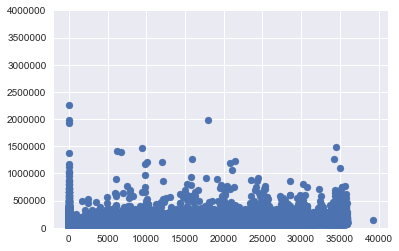

In [253]:
# Trying to see a relation between current loan amount and annual income
plt.scatter(train_df['Current Loan Amount'], train_df['Annual Income'])
plt.ylim(0, 4000000)

In [254]:
train_df = train_df[train_df['Annual Income'] < 3000000]

In [255]:
train_df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Years in current job,Monthly Debt,Maximum Open Credit
Current Loan Amount,1.000000,-0.150096,0.278681,0.098916,-0.030260,0.141503,-0.053507,0.232619,-0.073310,0.009702,0.086857,0.305315,0.012578
Credit Score,-0.150096,1.000000,0.038417,0.042386,0.025315,-0.021390,-0.021563,-0.000815,-0.016671,-0.014277,0.003233,-0.035194,0.005421
Annual Income,0.278681,0.038417,1.000000,0.183813,-0.069565,0.172523,-0.019529,0.363177,-0.055406,0.043301,0.114173,0.560602,0.037716
Years of Credit History,0.098916,0.042386,0.183813,1.000000,-0.039534,0.130078,0.059979,0.206257,0.060860,0.019630,0.159636,0.191993,0.019537
Months since last delinquent,-0.030260,0.025315,-0.069565,-0.039534,1.000000,-0.036965,0.091625,-0.025198,0.115448,0.002730,-0.013791,-0.053297,0.000292
Number of Open Accounts,0.141503,-0.021390,0.172523,0.130078,-0.036965,1.000000,-0.015976,0.226203,-0.022485,0.003454,0.061368,0.412066,0.015205
Number of Credit Problems,-0.053507,-0.021563,-0.019529,0.059979,0.091625,-0.015976,1.000000,-0.108120,0.818363,0.584563,0.021807,-0.055064,-0.008124
Current Credit Balance,0.232619,-0.000815,0.363177,0.206257,-0.025198,0.226203,-0.108120,1.000000,-0.128108,-0.012394,0.098597,0.476600,0.100371
Bankruptcies,-0.073310,-0.016671,-0.055406,0.060860,0.115448,-0.022485,0.818363,-0.128108,1.000000,0.046118,0.025186,-0.081815,-0.009593
Tax Liens,0.009702,-0.014277,0.043301,0.019630,0.002730,0.003454,0.584563,-0.012394,0.046118,1.000000,0.002217,0.017128,-0.000957


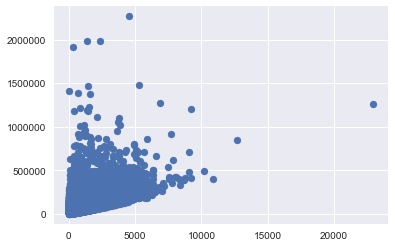

In [256]:
plt.scatter(train_df['Monthly Debt'], train_df['Annual Income'])

In [257]:
train_df[train_df['Monthly Debt'] < 15000]
train_df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Years in current job,Monthly Debt,Maximum Open Credit
Current Loan Amount,1.000000,-0.150096,0.278681,0.098916,-0.030260,0.141503,-0.053507,0.232619,-0.073310,0.009702,0.086857,0.305315,0.012578
Credit Score,-0.150096,1.000000,0.038417,0.042386,0.025315,-0.021390,-0.021563,-0.000815,-0.016671,-0.014277,0.003233,-0.035194,0.005421
Annual Income,0.278681,0.038417,1.000000,0.183813,-0.069565,0.172523,-0.019529,0.363177,-0.055406,0.043301,0.114173,0.560602,0.037716
Years of Credit History,0.098916,0.042386,0.183813,1.000000,-0.039534,0.130078,0.059979,0.206257,0.060860,0.019630,0.159636,0.191993,0.019537
Months since last delinquent,-0.030260,0.025315,-0.069565,-0.039534,1.000000,-0.036965,0.091625,-0.025198,0.115448,0.002730,-0.013791,-0.053297,0.000292
Number of Open Accounts,0.141503,-0.021390,0.172523,0.130078,-0.036965,1.000000,-0.015976,0.226203,-0.022485,0.003454,0.061368,0.412066,0.015205
Number of Credit Problems,-0.053507,-0.021563,-0.019529,0.059979,0.091625,-0.015976,1.000000,-0.108120,0.818363,0.584563,0.021807,-0.055064,-0.008124
Current Credit Balance,0.232619,-0.000815,0.363177,0.206257,-0.025198,0.226203,-0.108120,1.000000,-0.128108,-0.012394,0.098597,0.476600,0.100371
Bankruptcies,-0.073310,-0.016671,-0.055406,0.060860,0.115448,-0.022485,0.818363,-0.128108,1.000000,0.046118,0.025186,-0.081815,-0.009593
Tax Liens,0.009702,-0.014277,0.043301,0.019630,0.002730,0.003454,0.584563,-0.012394,0.046118,1.000000,0.002217,0.017128,-0.000957


In [258]:
data.head(20)

,Loan ID,Customer ID,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,11520.000000,741.0,33694.0,12.3,41.0,10.0,0.0,6760.000000,0.0,0.0,Fully Paid,Short Term,10.0,Home Mortgage,Debt Consolidation,584.03,16056.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,3441.000000,734.0,42269.0,26.3,NaN,17.0,0.0,6262.000000,0.0,0.0,Fully Paid,Short Term,4.0,Home Mortgage,Other,1106.04,19149.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,21029.000000,747.0,90126.0,28.8,NaN,5.0,0.0,20967.000000,0.0,0.0,Fully Paid,Short Term,10.0,Home Mortgage,Debt Consolidation,1321.85,28335.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,18743.000000,747.0,38072.0,26.2,NaN,9.0,0.0,22529.000000,0.0,0.0,Fully Paid,Short Term,10.0,Own Home,Debt Consolidation,751.92,43915.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,11731.000000,746.0,50025.0,11.5,NaN,12.0,0.0,17391.000000,0.0,0.0,Fully Paid,Short Term,4.0,Rent,Debt Consolidation,355.18,37081.0
5,0000a149-b055-4a57-b762-280783ccc25e,62ddc017-7023-4ba7-af23-1a7cd16c1ce5,10208.000000,716.0,41853.0,13.2,NaN,4.0,1.0,2289.000000,1.0,0.0,Fully Paid,Short Term,10.0,Rent,Business Loan,561.52,4671.0
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,24613.000000,664.0,49225.0,17.6,73.0,7.0,0.0,14123.000000,0.0,0.0,Charged Off,Long Term,6.0,Rent,Business Loan,542.29,16954.0
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,10036.000000,NaN,NaN,17.7,NaN,7.0,0.0,11970.000000,0.0,0.0,Fully Paid,Short Term,5.0,Rent,Debt Consolidation,386.36,16579.0
9,0001cb86-af28-4011-bb86-183786e473ae,4aae67bb-d54b-41ae-8bce-1d62022ed8dd,2036.000000,733.0,55985.0,19.8,29.0,7.0,0.0,10926.000000,0.0,0.0,Fully Paid,Short Term,0.0,Home Mortgage,Debt Consolidation,741.79,15676.0
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,0.000000,742.0,64760.0,26.8,NaN,11.0,0.0,8880.000000,0.0,0.0,Fully Paid,Short Term,3.0,Home Mortgage,Debt Consolidation,582.84,22711.0
